In [21]:
# handle imports
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)

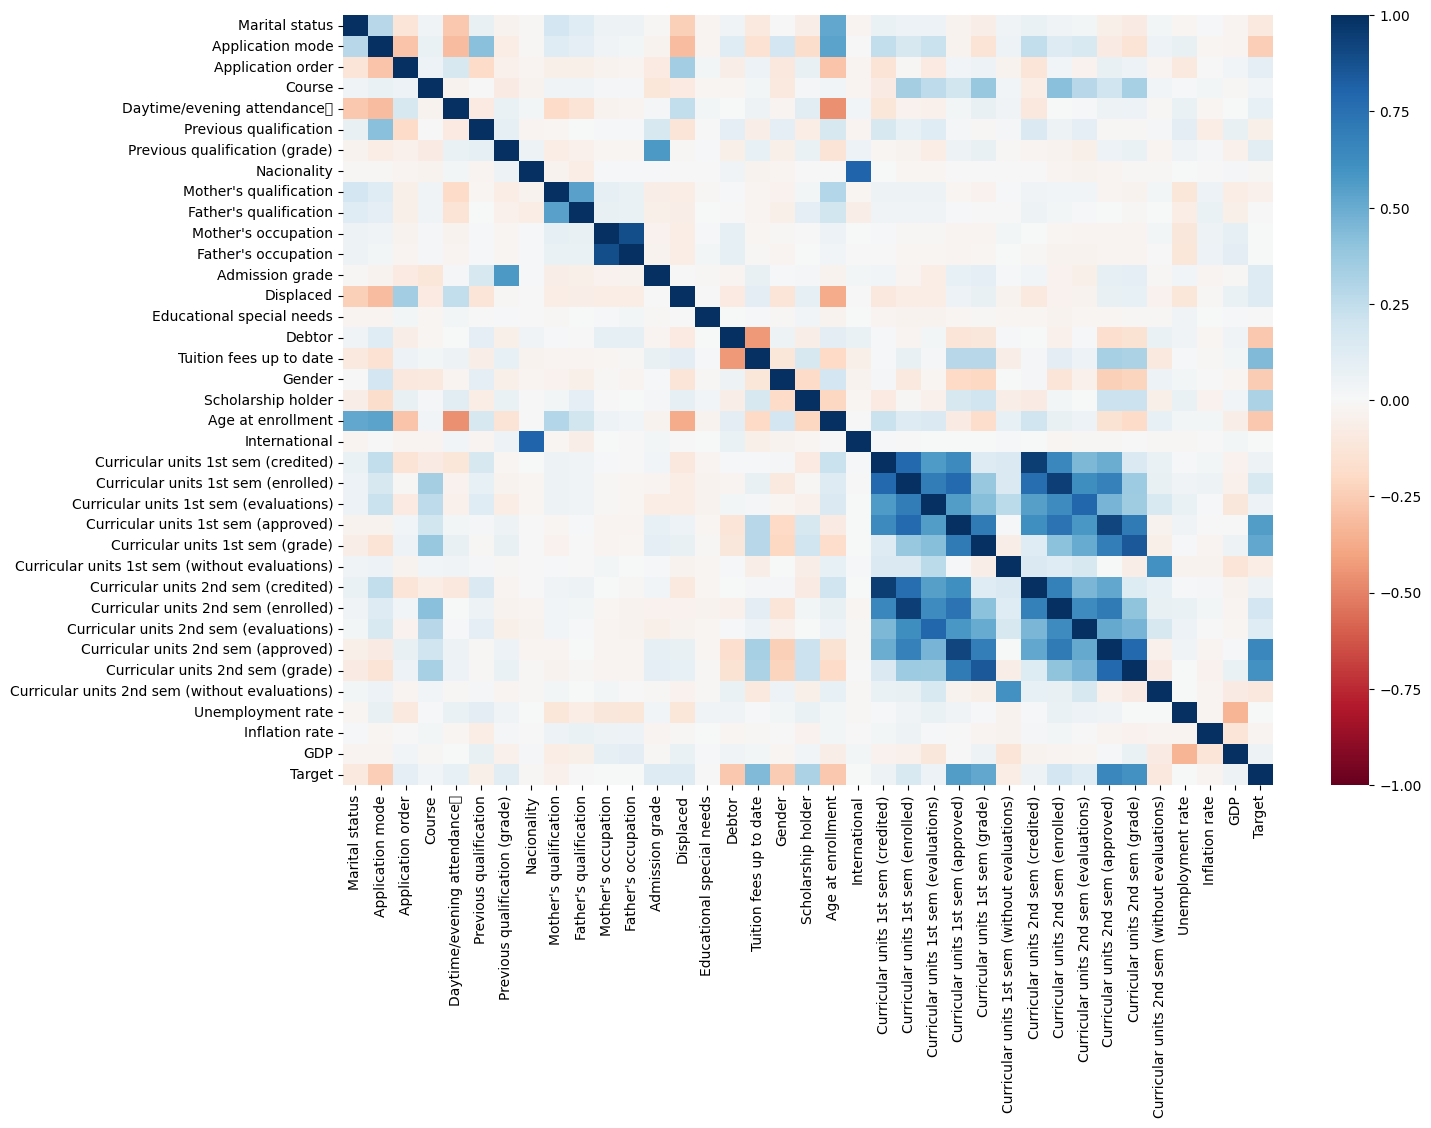

In [22]:
### Exploratory data analysis ###
df = pd.read_csv("../data.csv", sep=";")

# Must map categorical values to numbers or else the heatmap won't work
statusMap = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
df = df[df.Target != 'Enrolled']
df['Target'].value_counts()

train_data = df

train_data['Target'] = train_data['Target'].replace(statusMap)
plt.figure(figsize = (15,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap= 'RdBu')

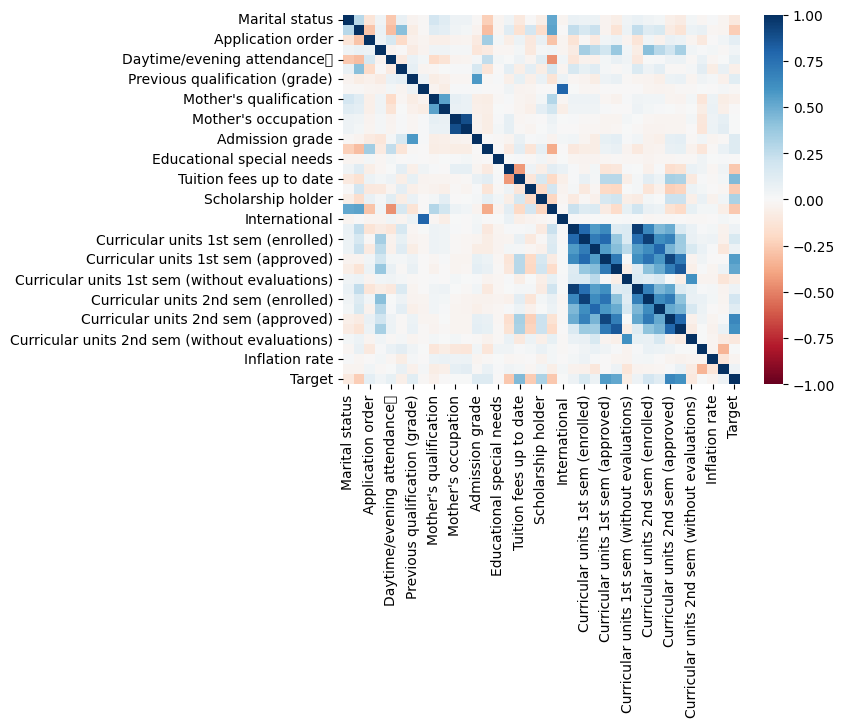

In [23]:
# Check if the columns exist in the dataframe before dropping them
columns_to_drop = [
    'Unemployment rate', 'Inflation rate', 'GDP', 'International',
    'Course', 'Nationality', 'Application order',
    "Mother's occupation", "Father's occupation",
    'Educational special needs'
]
df.drop(columns=existing_columns, inplace=True)

heatmap_after = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap='RdBu')

<Axes: xlabel='Gender', ylabel='Target'>

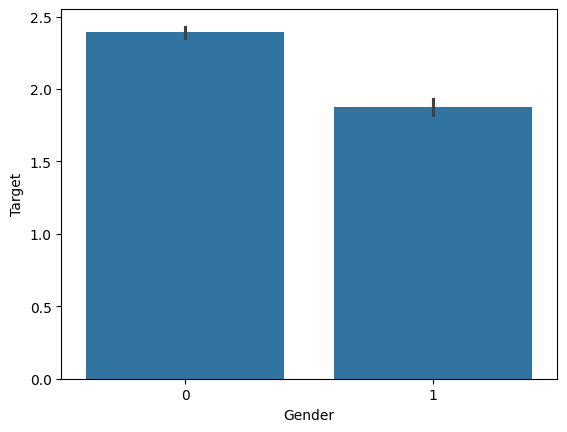

In [27]:
# do some static vis analyzing the higher correlated factors
# X_0 = female, X_1 = male | y_1 = dropout, y_2 = enrolled, y_3 = graduate
# catplot = sns.catplot(data=df, x="Target", y="Age at enrollment", hue="Gender")
sns.barplot(data=df, x="Gender", y="Target")

              precision    recall  f1-score   support

           1       0.88      0.87      0.88       420
           3       0.88      0.89      0.89       464

    accuracy                           0.88       884
   macro avg       0.88      0.88      0.88       884
weighted avg       0.88      0.88      0.88       884



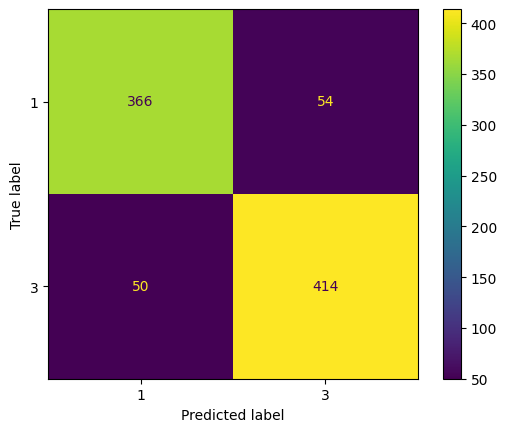

In [28]:
X = df.drop(columns=['Target'])
y = df['Target']

# Balance the dataset, as there are almost twice as many graduates than drop outs
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

# Split the data into training and testing sets (80 percent training, 20 percent testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a binomial logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)
joblib.dump(logreg, "bi-logistic-reg.pkl")
# Make predictions on the test data
predictions = logreg.predict(X_test)


print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)